In [10]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats


In [11]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframe
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [12]:
# Check if there are any missing or Null values
df.isnull()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
996,False,False,False,True,False,False,True,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False
999,True,False,False,False,False,False,False,False,False


In [13]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = df.isnull().any(axis=1).sum()
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [28]:
# kNN impute the missing data
# Use a k value of 5
# Import necessary libraries
from sklearn.impute import KNNImputer

# Create an instance of the KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)


In [30]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe
# Separate the features and the target variable (assuming 'Urgency' is the column name for the target variable)
# Separate the features and the target variable (assuming 'Urgency' is the column name for the target variable)
features = df.drop(columns=['Urgency'])
target = df['Urgency']

# Fit the imputer to the features data and transform the data
imputed_features = imputer.fit_transform(features)

# Convert the imputed array back to a DataFrame with the same column names as the original features
imputed_features_df = pd.DataFrame(imputed_features, columns=features.columns)

# Combine the imputed features with the target variable to create the final imputed DataFrame
df_imputed = pd.concat([imputed_features_df, target], axis=1)

# Replace the original DataFrame with the imputed DataFrame
df = df_imputed

# Print the first few rows of the imputed DataFrame to verify
print(df.head())
    

    age  sex  cough  fever  chills  sore_throat  headache  fatigue  Urgency
0  30.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0      0.0
1  47.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0      0.0
2  49.0  1.0    0.0    0.0     0.0          0.0       0.0      0.0      0.0
3  50.0  0.0    0.0    0.0     0.0          0.0       0.0      0.0      0.0
4  59.0  0.0    0.0    1.0     0.0          0.0       0.0      0.0      0.0


## EDA

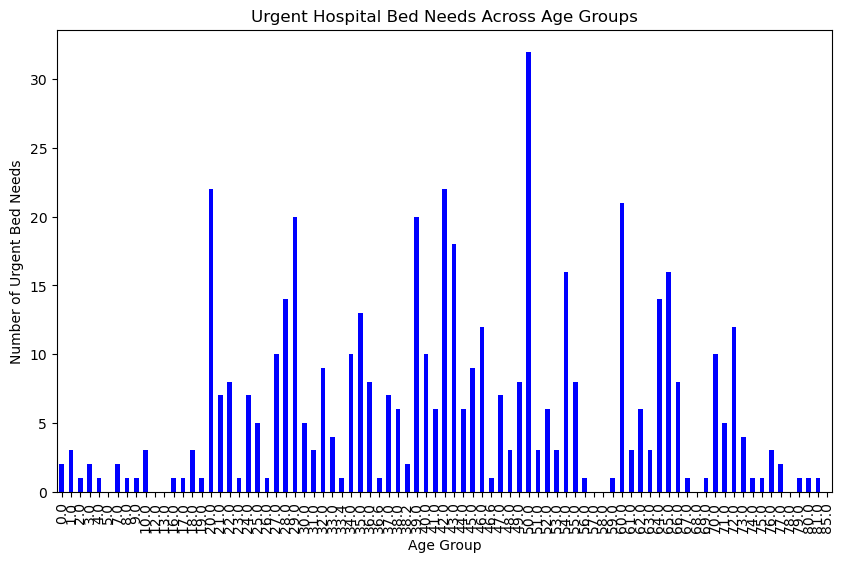

In [19]:
# Plot an appropriate graph to answer the following question
# Your code here
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a bar chart to show the number of urgent hospital bed needs across different age groups
# Assuming the DataFrame `df` contains a column 'age_group' for age groups and 'urgent_bed_needed' for the number of urgent bed needs

# Group the data by 'age_group' and sum the 'urgent_bed_needed' column
age_group_urgent_beds = df.groupby('age')['Urgency'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
age_group_urgent_beds.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Urgent Bed Needs')
plt.title('Urgent Hospital Bed Needs Across Age Groups')

# Show the plot
plt.show()


### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [20]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


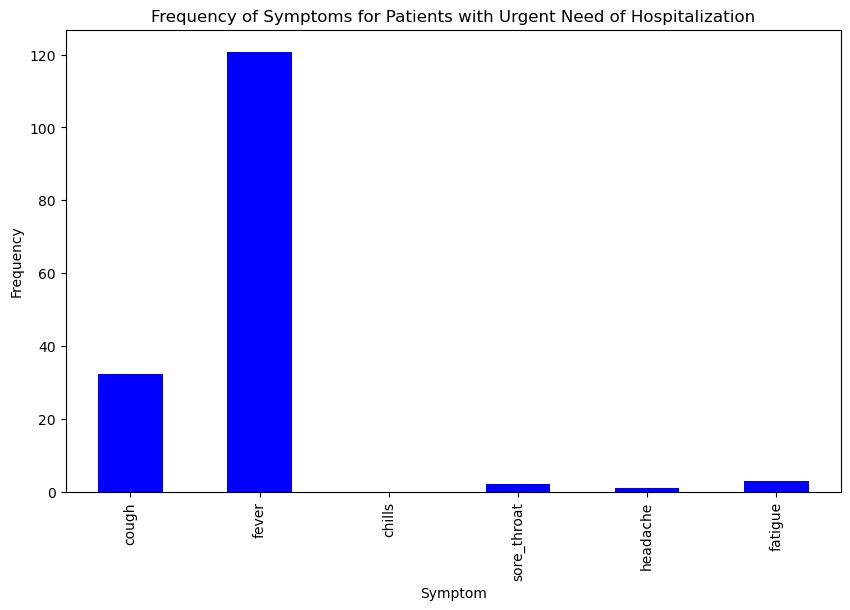

In [21]:
# Plot an appropriate graph to answer the following question    
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the DataFrame for patients with urgent need of hospitalization
# Assuming 'urgent_need' is the column indicating whether hospitalization is urgently needed (e.g., 1 for 'yes' and 0 for 'no')
urgent_patients = df[df['Urgency'] == 1]

# Assuming symptoms are in columns like 'symptom1', 'symptom2', 'symptom3', etc.
# Create a list of symptom columns
symptom_columns = ['cough', 'fever', 'chills', 'sore_throat','headache','fatigue']

# Count the frequency of each symptom in the filtered data
symptom_counts = {}
for symptom in symptom_columns:
    symptom_counts[symptom] = urgent_patients[symptom].sum()

# Convert the symptom counts dictionary to a Series
symptom_counts_series = pd.Series(symptom_counts)

# Plot the bar chart
plt.figure(figsize=(10, 6))
symptom_counts_series.plot(kind='bar', color='blue')

# Add labels and title
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.title('Frequency of Symptoms for Patients with Urgent Need of Hospitalization')

# Show the plot
plt.show()



### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [22]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


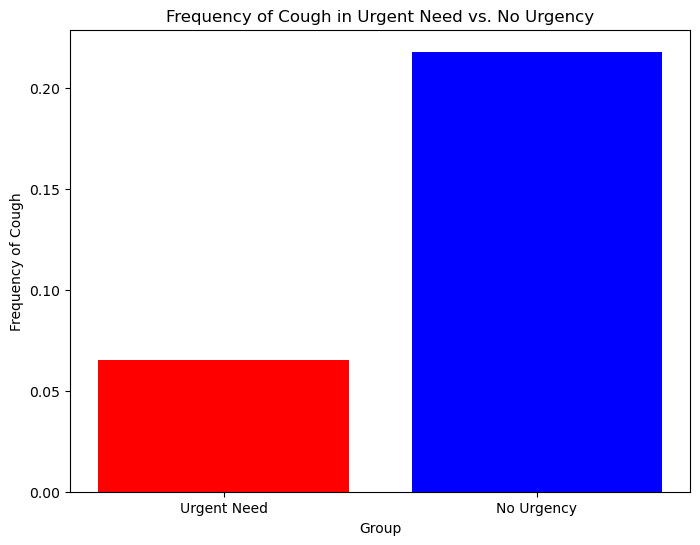

In [23]:
# Plot an appropriate graph to answer the following question    
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the DataFrame for patients with and without urgent need for hospitalization
urgent_patients = df[df['Urgency'] == 1]
non_urgent_patients = df[df['Urgency'] == 0]

# Calculate the frequency of cough in each group
# Assuming 'cough' is the column representing whether a patient has cough or not
# Calculate the proportion of patients with cough in each group
urgent_cough_frequency = urgent_patients['cough'].mean()  # Mean of the 'cough' column in the urgent patients group
non_urgent_cough_frequency = non_urgent_patients['cough'].mean()  # Mean of the 'cough' column in the non-urgent patients group

# Create a bar chart to compare the frequency of cough in each group
labels = ['Urgent Need', 'No Urgency']
frequencies = [urgent_cough_frequency, non_urgent_cough_frequency]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, frequencies, color=['red', 'blue'])

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Frequency of Cough')
plt.title('Frequency of Cough in Urgent Need vs. No Urgency')

# Show the plot
plt.show()



### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [24]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [25]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split

# Your code here
df_train, df_test = train_test_split(df, test_size=0.3, random_state=60)

In [26]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv("covid_train.csv", index=False)

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv("covid_test.csv", index=False)
